<h1 style="text-align: center">Klasyfikowanie emocji za pomocą sygnałów EDA i ECG</h1>
<h3 style="text-align: center">Projekt z przedmiotu Podstawy Sztucznej Inteligencji, EAIiIB 2019/20</h3>
<h5 style="text-align: right"> Tabor Ewa, Maciej Wilk</h5>

<h1> Dalszy preprocessing: </h1>

Posiadając połączone dane, dla każdego badanego usunięto kolumny: 'GAME-TIMESTAMP', "TIMESTAMP","COND", "Unnamed: 0", a następnie połączono kolumny odpowiadające emocjom w jedną, według schematu: 
 
<ul>
    <li>"ANGER" -> 0,</li>
    <li> "CONTEMPT" -> 1,</li>
    <li>"DISGUST" -> 2,</li>
    <li>"FEAR" -> 3,</li>
    <li>"HAPPINESS" -> 4,</li>
    <li>"NEUTRAL" -> 5</li>
    <li>"SADNESS" -> 6,</li>
    <li>"SURPRISE" -> 7</li>
</ul><br/>
Na raz rozpatrywana jest tylko jedna emocja poprzez wybranie tej, która osiąga max z wszystkich emocji w danym wierszu.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import sklearn
import sys
import glob
import re
import hvplot.pandas
from matplotlib import pyplot

In [2]:
path = "MERGED"

In [3]:
all_files = glob.glob(path + "/*.csv")

In [4]:
def emotion(row):
    emotions = []
    emotions.append(row["ANGER"])
    emotions.append(row["CONTEMPT"])
    emotions.append(row["DISGUST"])
    emotions.append(row["FEAR"])
    emotions.append(row["HAPPINESS"])
    emotions.append(row["NEUTRAL"])
    emotions.append(row["SADNESS"])
    emotions.append(row["SURPRISE"])
    if max(emotions) == emotions[0]:
        return 0
    elif max(emotions) == emotions[1]:
        return 1
    elif max(emotions) == emotions[2]:
        return 2
    elif max(emotions) == emotions[3]:
        return 3
    elif max(emotions) == emotions[4]:
        return 4
    elif max(emotions) == emotions[5]:
        return 5
    elif max(emotions) == emotions[6]:
        return 6
    else:
        return 7

In [5]:
dataset = []
for file in all_files:
    data = pd.read_csv(file)
    data = data.drop(columns=['GAME-TIMESTAMP', "TIMESTAMP","COND", "Unnamed: 0"])
    dataset.append(data)
dataset[144] = pd.read_csv("MERGED/merged145.csv").drop(columns=['GAME-TIMESTAMP', "TIMESTAMP","COND", "Unnamed: 0"])

In [6]:
dataset[144]

,ANGER,CONTEMPT,DISGUST,FEAR,HAPPINESS,NEUTRAL,SADNESS,SURPRISE,ECG,EDA
0,0.000,0.334,0.000,0.0,0.049,0.616,0.000,0.000,0.017129,1.733398
1,0.000,0.001,0.000,0.0,0.000,0.997,0.001,0.000,-0.027624,1.513672
2,0.001,0.016,0.000,0.0,0.000,0.979,0.003,0.000,-0.375325,2.148438
3,0.001,0.005,0.000,0.0,0.000,0.993,0.001,0.000,-0.107279,2.221680
4,0.005,0.000,0.001,0.0,0.000,0.000,0.000,0.994,-0.215670,2.563477
...,...,...,...,...,...,...,...,...,...,...
1257,0.000,0.003,0.000,0.0,0.000,0.996,0.000,0.000,-0.199185,2.758789
1258,0.000,0.002,0.000,0.0,0.000,0.997,0.001,0.000,-0.032207,2.758789
1259,0.000,0.000,0.000,0.0,0.000,0.999,0.000,0.000,-0.005310,2.270508
1260,0.000,0.000,0.000,0.0,0.000,0.999,0.000,0.000,-0.014660,2.685547


In [7]:
for i in range(len(dataset)):
    dataset[i]["EMOTIONS"] = dataset[i].apply(emotion, axis=1)

In [8]:
for i in range (len(dataset)):
    dataset[i] = dataset[i].drop(columns=["ANGER","CONTEMPT","DISGUST","FEAR","HAPPINESS","NEUTRAL","SADNESS","SURPRISE"])

In [9]:
dataset[0]

,ECG,EDA,EMOTIONS
0,0.037519,7.763672,5
1,0.004248,7.739258,5
2,0.656558,7.885742,5
3,-0.001685,8.081055,5
4,0.075040,8.032227,5
...,...,...,...
1213,0.113698,8.422852,5
1214,-0.039174,8.422852,5
1215,0.014353,8.447266,5
1216,0.012030,8.471680,5


<h1> Przygotowanie podstawowych modeli: </h1>

Przy wyborze modeli kierowano się artykułem polecanym w laboratoriach https://www.kdnuggets.com/2018/04/10-machine-learning-algorithms-data-scientist.html.

Wybrano modele zajmujące się klasyfikacją z rodzaju uczenia nadzorowanego. Wszystkie są dostępne w bibliotece sklearn. 

<b>Wybrane modele:</b> 
<ul>
    <li>"SGDClassifier",</li>
    <li>"K-NearestNeighbour",</li>
    <li>"NaiveBayes",</li>
    <li>"DecisionTreeClassifier",</li>
    <li>"NeutralNetwork",</li>
    <li>"RidgeClassifier",</li>
    <li>"GradientBoostingClassifier",</li>
    <li>"RandomForestClassifier",</li>
    <li>"SVM".</li>
</ul><br/>



Poniższe diagramy przedstawiają rozkład emocji w zależności od parametrów, względem których będą przewidywane.

In [10]:
dataset[0].hvplot(kind = "scatter", x="ECG", y=["EMOTIONS"])

:Scatter   [ECG]   (EMOTIONS)

In [11]:
dataset[0].hvplot(kind = "scatter", x="EDA", y=[ "EMOTIONS"])

:Scatter   [EDA]   (EMOTIONS)

In [12]:
wholedata = pd.concat(dataset)

In [13]:
wholedata

,ECG,EDA,EMOTIONS
0,0.037519,7.763672,5
1,0.004248,7.739258,5
2,0.656558,7.885742,5
3,-0.001685,8.081055,5
4,0.075040,8.032227,5
...,...,...,...
1240,-0.000142,18.725586,5
1241,-0.000433,18.994141,5
1242,0.000081,17.651367,5
1243,-0.000230,17.041016,5


In [68]:
datano5 = wholedata[wholedata["EMOTIONS"] != 5]
#datano5 = datano5[datano5["EMOTIONS"] != 4]

In [69]:
values = wholedata.values
valuesdatano5 = datano5.values

In [70]:
X = values[:,0:2]
y = values[:,2]
X5 = valuesdatano5[:,0:2]
y5 = valuesdatano5[:,2]


In [21]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

<h1> Dobór odpowiednich parametrów: </h1>
Każdy model został testowany w ten sam sposób:
dataset został podzielony w stosunku 1 do 9 na zbriór testowy i zbiór treningowy,
następnie przprowadzono walidację krzyżową według strategii Stratified K-Folds cross-validator, która różni się od K-krotnej walidacji poprzez zachowanie procent próbek dla każdej klasy:

"This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class."

Ten podział musiał być nie większy niż 7, gdyż taka jest próbka dla najrzadszej klasy.

Na podstawie tej walidacji wybrano najlepszy model/modele, dla ktrórych przeprowadzono dopasowanie i predykcję dla datasetu, z której wyciągnięto jej dokładność, raport klasyfikacji oraz tablicę pomyłek.


W ten sposób działania przeprowadzone na całym zbiorze danych dały modele o dokładności >95%, ale ich przyporządkowanie zawsze zwracało NEUTRAL, dlatego też ograniczono zbiór danych o tą emocję i ponownie przeprowadzono porówanie.

In [59]:
features = X
target = np.ravel(y)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.1, random_state = 1)

models = []
models.append(("SGDClassifier", SGDClassifier(loss="hinge", penalty="elasticnet", max_iter=200)))
models.append(("NearestNeighbour", KNeighborsClassifier(n_neighbors=10, weights='distance')))
models.append(("NaiveBayes", GaussianNB()))
models.append(("DecisionTreeClassifier", DecisionTreeClassifier()))
models.append(("NeutralNetwork", MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(2, 1), random_state=1)))
models.append(("RidgeClassifier", RidgeClassifier()))
models.append(("GradientBoostingClassifier", GradientBoostingClassifier()))
models.append(("RandomForestClassifier", RandomForestClassifier()))
models.append(('SVM', SVC()))

<h1> Porównanie modeli:</h1>

In [60]:
results = []
names = []
for name, model in models:
    cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, features_train, target_train, cv=cv, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('Model: %s\nAccuracy: %f (+/- %f)' % (name, cv_results.mean(), cv_results.std()))


Model: SGDClassifier
Accuracy: 0.978536 (+/- 0.000014)
Model: NearestNeighbour
Accuracy: 0.973145 (+/- 0.000247)
Model: NaiveBayes
Accuracy: 0.974093 (+/- 0.000813)
Model: DecisionTreeClassifier
Accuracy: 0.958701 (+/- 0.000907)
Model: NeutralNetwork
Accuracy: 0.978536 (+/- 0.000014)
Model: RidgeClassifier
Accuracy: 0.978536 (+/- 0.000014)
Model: GradientBoostingClassifier
Accuracy: 0.976012 (+/- 0.000395)
Model: RandomForestClassifier
Accuracy: 0.974661 (+/- 0.000158)
Model: SVM
Accuracy: 0.978536 (+/- 0.000014)


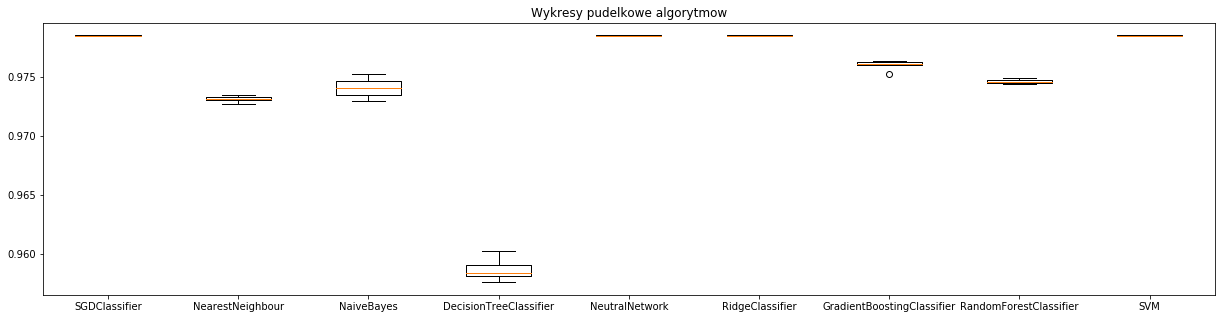

In [61]:
pyplot.figure(figsize=(21,5))
pyplot.boxplot(results, labels=names)
pyplot.title('Wykresy pudelkowe algorytmow')
pyplot.show()

In [62]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(2, 1), random_state=1)
model.fit(features_train, target_train)
predictions = model.predict(features_test)

print("accuracy score:")
print(accuracy_score(target_test, predictions),'\n\n')

print("classification report:")
print(classification_report(target_test, predictions),'\n\n')

print("confusion matrix:")
print(confusion_matrix(target_test, predictions))

accuracy score:
0.9766995467875234 


classification report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       152
         1.0       0.00      0.00      0.00        28
         4.0       0.00      0.00      0.00       207
         5.0       0.98      1.00      0.99     18318
         6.0       0.00      0.00      0.00        42
         7.0       0.00      0.00      0.00         8

    accuracy                           0.98     18755
   macro avg       0.16      0.17      0.16     18755
weighted avg       0.95      0.98      0.97     18755
 


confusion matrix:
[[    0     0     0   152     0     0]
 [    0     0     0    28     0     0]
 [    0     0     0   207     0     0]
 [    0     0     0 18318     0     0]
 [    0     0     0    42     0     0]
 [    0     0     0     8     0     0]]


c:\users\maciej wilk\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
features = X5
target = np.ravel(y5)
features_train1, features_test1, target_train1, target_test1 = train_test_split(features,target, test_size = 0.1, random_state = 1)
models1 = []
models1.append(("SGDClassifier", SGDClassifier(loss="hinge", penalty="elasticnet", max_iter=200)))
models1.append(("NearestNeighbour", KNeighborsClassifier(n_neighbors=10, weights='distance')))
models1.append(("NaiveBayes", GaussianNB()))
models1.append(("DecisionTreeClassifier", DecisionTreeClassifier()))
models1.append(("NeutralNetwork", MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(2, 1), random_state=1)))
models1.append(("RidgeClassifier", RidgeClassifier()))
models1.append(("GradientBoostingClassifier", GradientBoostingClassifier()))
models1.append(("RandomForestClassifier", RandomForestClassifier()))
models1.append(('SVM', SVC()))


In [72]:
results1 = []
names1 = []
for name, model in models1:
    cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, features_train1, target_train1, cv=cv, scoring='accuracy')
    results1.append(cv_results)
    names1.append(name)
    print('Model: %s\nAccuracy: %f (+/- %f)' % (name, cv_results.mean(), cv_results.std()))

Model: SGDClassifier
Accuracy: 0.289766 (+/- 0.102604)
Model: NearestNeighbour
Accuracy: 0.636293 (+/- 0.018949)
Model: NaiveBayes
Accuracy: 0.467705 (+/- 0.025133)
Model: DecisionTreeClassifier
Accuracy: 0.582925 (+/- 0.010204)
Model: NeutralNetwork
Accuracy: 0.469349 (+/- 0.000257)
Model: RidgeClassifier
Accuracy: 0.469623 (+/- 0.000805)
Model: GradientBoostingClassifier
Accuracy: 0.679255 (+/- 0.012925)
Model: RandomForestClassifier
Accuracy: 0.641221 (+/- 0.015804)
Model: SVM
Accuracy: 0.562950 (+/- 0.027044)


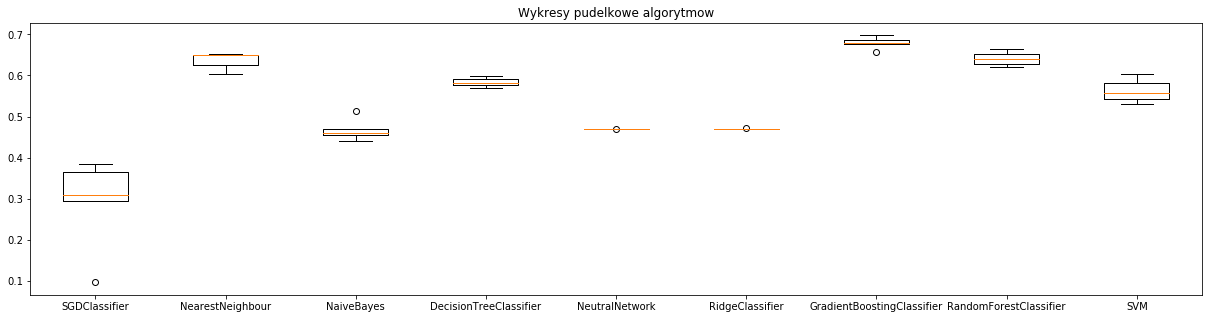

In [73]:
pyplot.figure(figsize=(21,5))
pyplot.boxplot(results1, labels=names1)
pyplot.title('Wykresy pudelkowe algorytmow')
pyplot.show()

In [74]:
model = GradientBoostingClassifier()
model.fit(features_train1, target_train1)
predictions = model.predict(features_test1)


print("accuracy score:")
print(accuracy_score(target_test1, predictions),'\n\n')

print("classification report:")
print(classification_report(target_test1, predictions),'\n\n')

print("confusion matrix:")
print(confusion_matrix(target_test1, predictions))

accuracy score:
0.6945812807881774 


classification report:
              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       144
         1.0       0.67      0.08      0.14        26
         2.0       0.00      0.00      0.00         2
         4.0       0.69      0.79      0.74       179
         6.0       0.75      0.56      0.64        43
         7.0       1.00      0.08      0.15        12

    accuracy                           0.69       406
   macro avg       0.63      0.38      0.40       406
weighted avg       0.70      0.69      0.67       406
 


confusion matrix:
[[114   1   0  28   1   0]
 [  7   2   0  17   0   0]
 [  1   0   0   1   0   0]
 [ 30   0   1 141   7   0]
 [  8   0   0  11  24   0]
 [  5   0   0   6   0   1]]


In [75]:
model = KNeighborsClassifier(n_neighbors=10, weights='distance')
model.fit(features_train1, target_train1)
predictions = model.predict(features_test1)


print("accuracy score:")
print(accuracy_score(target_test1, predictions),'\n\n')

print("classification report:")
print(classification_report(target_test1, predictions),'\n\n')

print("confusion matrix:")
print(confusion_matrix(target_test1, predictions))

accuracy score:
0.6650246305418719 


classification report:
              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70       144
         1.0       0.45      0.19      0.27        26
         2.0       0.00      0.00      0.00         2
         4.0       0.67      0.77      0.72       179
         6.0       0.60      0.58      0.59        43
         7.0       0.50      0.08      0.14        12

    accuracy                           0.67       406
   macro avg       0.49      0.39      0.40       406
weighted avg       0.65      0.67      0.65       406
 


confusion matrix:
[[102   3   0  34   5   0]
 [  7   5   0  14   0   0]
 [  1   0   0   1   0   0]
 [ 27   3   0 137  11   1]
 [  6   0   0  12  25   0]
 [  4   0   0   6   1   1]]


c:\users\maciej wilk\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h1> Wybór najlepszego modelu: </h1>
Najlepszymi algorytmami, w tym przypadku będą KNeighborsClassifier i GradientBoostingClassifier, KNeighboursClassifier daje drugi co do dokładności wynik przyporządkowania, natomiast jego wykonanie jest znacząco szybsze od najlepszego GradientBoostingClassifier, dlatego warto go uwzględnić. 

<h1>Warstwa wyjaśniająca (explainability):</h1>

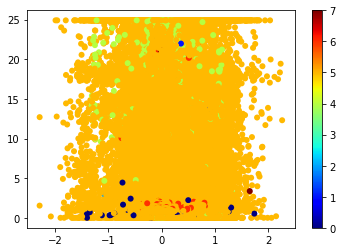

In [53]:
pyplot.scatter(wholedata["ECG"],wholedata["EDA"], c = wholedata["EMOTIONS"], cmap="jet", lw=0)
pyplot.colorbar(points)
pyplot.draw()

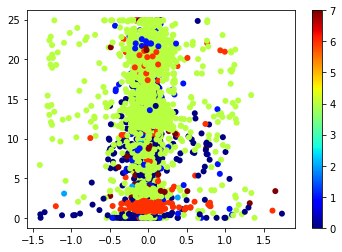

In [76]:
pyplot.scatter(datano5["ECG"], datano5["EDA"], c = datano5["EMOTIONS"], cmap="jet", lw=0)
pyplot.colorbar(points)
pyplot.draw()

Na podstawie powyższych wykresów widać, że modele dla danych całościowych (żadne emocje nie zostały pominiętę), pomimo że ma dokładność > 95% dla każdego z użytych modeli, nie są one szczególnie interesujące, gdyż patrząc na przykład na tablicę pomyłek wybranego modelu widać, że zawsze przyporządkowuje emocję do NEUTRAL, a jako że pokrywa się ona z każdą inną i ma dużo więcej próbek, to przeważnie przyporządkowanie jest poprawne 

Bardziej interesującymi danymi są datano5, z których usunięto emocję nr 5.

Na tak przygotowanych danych modele miały większy sens działania, gdyż faktycznie przyporządkowywały różne omocje do różnych kombinacji ECG i EDA.

Mimo że modele bazujące na datano5 mają gorsze przyporządkowanie wachające się od ok. 28% do ok. 68% to uważamy, że jest to akceptowalny wynik naszego badania.

Wnioski:

Ludzkie emocje są zbyt skomplikowane by jednoznacznie określić je za pomocą dwóch parametrów naszego ciała, które też nie są ściśle powiązane z nimi.

Redukując dane z najpopularniejszych emocji można zauważyć realację między emocjami a ECG i EDA, natomiast pytaniem jest wtedy, czy nie uproszczono zbytnio samego przedmiotu badań, gdyż człowiek nie mógłby wtedy mieć odczuć neutralnych względem wykonywanych czynności.